# Extract features from tissue images
In addition to the spatial gene expression values, visium datasets also contain high-resolution images of the tissue.
In this notebook we extract features from this image and create a `obs x features` matrix that can be analysed together with the `obs x genes` spatial gene expression matrix. 
For this we will use the `calculate_image_features` function.

We will have a detailled look at the currently implemented features:
- summary statistics of each color channel (`summary`)
- histogram of oriented gradients (`hog`) - NOTE I don't think HOG features make much sense for us...
- texture features based on repeating patterns (`texture`)
- color histogram features using counts in bins of each channel's histogram (`color_hist`)
- number and size of objects from a binary segmentation layer (`segmentation`)

Additionally, we will see how to calculate features for other image layers and how to change the size and scale of the crops that are used to extract the features.


## Load data
TODO: download data on the fly

In [4]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'

In [2]:
import importlib
importlib.reload(sq)

NameError: name 'sq' is not defined

In [5]:
# ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import scanpy as sc
import numpy as np
import squidpy as sq

import seaborn as sns
import matplotlib.pyplot as plt
import os

/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/docrep/decorators.py:26: SyntaxWarning: 'xy_coord' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [6]:
# set path to dataset
BASE_PATH = "../../data"
dataset_folder = os.path.join(BASE_PATH, "20191205_10XVisium_MouseBrainCoronal_giovanni.palla")
adata, img = sq.read_visium_data(dataset_folder)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.var` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'feature_types' as categorical
Trying to set attribute `.var` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'genome' as categorical


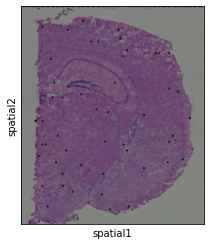

In [7]:
# subset adata to make computation of features fast
adata = adata[0:50]
# show which spots are selected for calculating the features
sc.pl.spatial(adata, add_outline=True)

## Calculate image features
`calculate_image_features` extracts features from the tissue image and writes the result to `adata.obsm[key]`.

In [8]:
# calculate features
sq.im.calculate_image_features(adata, img, features=['summary', 'texture', 'histogram'], key='features')


In [9]:
print(f"calculated features: {list(adata.obsm['features'].columns)}")
display(adata.obsm['features'].head())

calculated features: ['summary_quantile_0.9_ch_0', 'summary_quantile_0.5_ch_0', 'summary_quantile_0.1_ch_0', 'summary_quantile_0.9_ch_1', 'summary_quantile_0.5_ch_1', 'summary_quantile_0.1_ch_1', 'summary_quantile_0.9_ch_2', 'summary_quantile_0.5_ch_2', 'summary_quantile_0.1_ch_2', 'texture_contrast_ch_0_dist_1_angle_0.00', 'texture_contrast_ch_0_dist_1_angle_0.79', 'texture_contrast_ch_0_dist_1_angle_1.57', 'texture_contrast_ch_0_dist_1_angle_2.36', 'texture_dissimilarity_ch_0_dist_1_angle_0.00', 'texture_dissimilarity_ch_0_dist_1_angle_0.79', 'texture_dissimilarity_ch_0_dist_1_angle_1.57', 'texture_dissimilarity_ch_0_dist_1_angle_2.36', 'texture_homogeneity_ch_0_dist_1_angle_0.00', 'texture_homogeneity_ch_0_dist_1_angle_0.79', 'texture_homogeneity_ch_0_dist_1_angle_1.57', 'texture_homogeneity_ch_0_dist_1_angle_2.36', 'texture_correlation_ch_0_dist_1_angle_0.00', 'texture_correlation_ch_0_dist_1_angle_0.79', 'texture_correlation_ch_0_dist_1_angle_1.57', 'texture_correlation_ch_0_dist_

,summary_quantile_0.9_ch_0,summary_quantile_0.5_ch_0,summary_quantile_0.1_ch_0,summary_quantile_0.9_ch_1,summary_quantile_0.5_ch_1,summary_quantile_0.1_ch_1,summary_quantile_0.9_ch_2,summary_quantile_0.5_ch_2,summary_quantile_0.1_ch_2,texture_contrast_ch_0_dist_1_angle_0.00,...,histogram_ch_2_bin_0,histogram_ch_2_bin_1,histogram_ch_2_bin_2,histogram_ch_2_bin_3,histogram_ch_2_bin_4,histogram_ch_2_bin_5,histogram_ch_2_bin_6,histogram_ch_2_bin_7,histogram_ch_2_bin_8,histogram_ch_2_bin_9
AAACAAGTATCTCCCA-1,132.0,111.0,77.0,102.0,79.0,54.0,138.0,111.0,88.0,185.954418,...,0,28,343,1408,3211,2083,636,181,27,4
AAACAATCTACTAGCA-1,140.0,111.0,80.0,87.0,60.0,39.0,135.0,108.0,84.0,151.075587,...,0,2,126,759,2155,2766,1537,476,95,5
AAACACCAATAACTGC-1,132.0,116.0,89.0,109.0,91.0,67.0,130.0,117.0,97.0,51.515322,...,0,1,27,135,312,662,2819,3129,810,26
AAACAGAGCGACTCCT-1,136.0,116.0,93.0,115.0,82.0,58.0,137.0,113.0,89.0,165.692160,...,0,9,79,509,1640,2832,1979,697,137,39
AAACCGGGTAGGTACC-1,137.0,112.0,83.0,103.0,78.0,54.0,133.0,113.0,92.0,107.647472,...,0,0,18,360,1475,3007,2281,703,74,3


## Extract features with different crop sizes and image scales
Features are extracted from image crops that are centered on the visium spots (see also `tutorial_image_cropping.ipynb`). By default, the crops have the same size as the spot, are not scaled and not masked. We can use the `mask_circle`, `scale`, and `size` arguments to change how the crops are generated. 

- Use `mask_circle=True, scale=1, size=1`, if you would like to get features that are calculated only from tissue in a visium spot
- Use `scale=X`, with `X < 1`, if you would like to downscale the crop before extracting the features
- Use `size=X`, with `X > 1`, if you would like to extract crops that are X-times the size of the visium spot

In [11]:
# calculate features with masking
sq.im.calculate_image_features(adata, img, features=['summary', 'texture', 'histogram'], 
                                                   key='features_masked', mask_circle=True)
# calculate features with scaling and larger context
sq.im.calculate_image_features(adata, img, features=['summary', 'texture', 'histogram'], 
                                                   key='features_scaled', mask_circle=True, size=2, scale=0.5)



/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

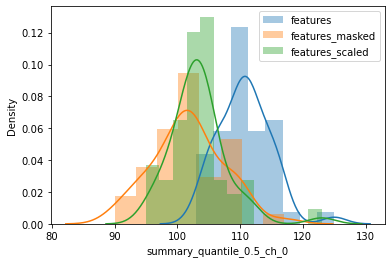

In [15]:
# plot distribution of median for different cropping options
sns.distplot(adata.obsm['features']['summary_quantile_0.5_ch_0'], label='features')
sns.distplot(adata.obsm['features_masked']['summary_quantile_0.5_ch_0'], label='features_masked')
sns.distplot(adata.obsm['features_scaled']['summary_quantile_0.5_ch_0'], label='features_scaled')
_ = plt.legend()


masked features have lower median values, because the area outside the circle is masked with zeros.

## Details of implemented features
### Summary statistics
Summary statistics give a good overview over the intensity of the three image channels at the location of the visium spots.
By default, the 0.9th, 0.5th, and 0.1th quantiles are calculated.

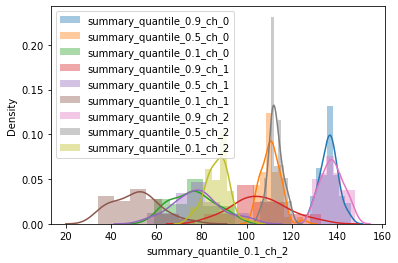

In [25]:
sq.im.calculate_image_features(adata, img, features=['summary'], key='summary_features', show_progress_bar=False)

# show the distribution of calculated quantiles
for col_id in adata.obsm['summary_features'].columns:
    sns.distplot(adata.obsm['summary_features'][col_id], label=col_id)
_ = plt.legend()

Using `features_kwargs`, we can change which quantiles are calculated, additionally calculate mean and std for each crop, and set the channels for which the features should be calculated

In [27]:
sq.im.calculate_image_features(adata, img, features=['summary'], key='summary_features', 
                                 features_kwargs={'summary': {'channels': [1,2], 'mean':True, 'quantiles':[0.4]}})
print(adata.obsm['summary_features'].columns)


Index(['summary_quantile_0.4_ch_1', 'summary_mean_ch_1',
       'summary_quantile_0.4_ch_2', 'summary_mean_ch_2'],
      dtype='object')


### Texture features
These features give a measure of how the image intensity at different distances and angles varies by calculating a grey-level co-occurence matrix (GLCM). From this data, different features (`props`) are calculated.
With the `features_kwargs` `distances` and `angles` we can change how the GLCM is calculated, and with `props` we adapt which features are extracted from it. 

In [29]:
sq.im.calculate_image_features(adata, img, features=['texture'], key='texture_features', 
                                 features_kwargs={'texture': 
                                                  {'distances': [2], 'angles':[0], 
                                                  'props': ['contrast', 'correlation']}})


Index(['texture_contrast_ch_0_dist_2_angle_0.00',
       'texture_correlation_ch_0_dist_2_angle_0.00',
       'texture_contrast_ch_1_dist_2_angle_0.00',
       'texture_correlation_ch_1_dist_2_angle_0.00',
       'texture_contrast_ch_2_dist_2_angle_0.00',
       'texture_correlation_ch_2_dist_2_angle_0.00'],
      dtype='object')


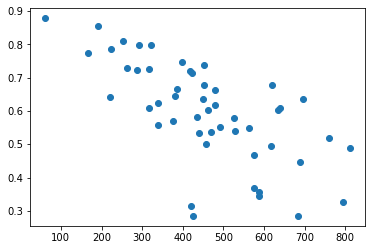

In [32]:
print(adata.obsm['texture_features'].columns)
# show the resulting features
_ = plt.scatter(
    adata.obsm['texture_features']['texture_contrast_ch_0_dist_2_angle_0.00'],
    adata.obsm['texture_features']['texture_correlation_ch_0_dist_2_angle_0.00']
)

the features contrast and correlation are inversely correlated

### Histogram
These features give a more detailled view than summary_features by computing a histogram of each image channel. We can adapt the `channels` and the number of `bins` for the histogram.

In [36]:
sq.im.calculate_image_features(adata, img, features=['histogram'], key='hist_features', 
                                 features_kwargs={'histogram':{'bins':10, 'channels': [1]}})


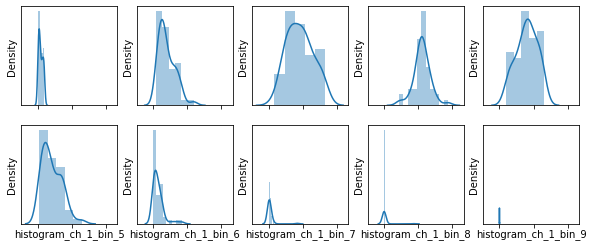

In [38]:
# plot the distribution of counts in different bins for all spots
fig, axes = plt.subplots(2,5, sharex=True, figsize=(10,4))
for i, ax in enumerate(axes.flat):
    sns.distplot(adata.obsm['hist_features'][f'histogram_ch_1_bin_{i}'], ax=ax)
    ax.tick_params(axis=u'y', which=u'both',length=0)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)

### Segmentation
We can also extract features from a binary segmented image. Here, we extract the number of objects, the average size of objects, and the intensity of the image channels in the masked areas

In [8]:
# use a fluorescence dataset for the segmentation
BASE_PATH = "../../data"
dataset_folder = os.path.join(BASE_PATH, "2020_10XFluoVisium_MouseBrain2_giovanni.palla")
adata, img = sq.read_visium_data(dataset_folder)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [9]:
sq.im.segment_img(img=img, img_id="image", model_group="watershed", channel_idx=0, key_added="segmented",
    model_kwargs={ "thresh": 50000}, xs=1000, ys=1000,)

In [25]:
sq.im.calculate_image_features(adata, img, features=['segmentation'], key='features', 
                                 features_kwargs={'segmentation':{'label_img_id': 'segmented', 'channels': [1]}})



/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [29]:
display(adata.obsm['features'])

,segmentation_label,segmentation_area_mean,segmentation_mean_intensity_ch1_mean
AAACAAGTATCTCCCA-1,14,68.285714,11266.639414
AAACAGAGCGACTCCT-1,3,32.000000,4170.284531
AAACAGTGTTCCTGGG-1,0,NaN,NaN
AAACATTTCCCGGATT-1,15,103.066667,15998.002591
AAACCGGGTAGGTACC-1,1,138.000000,30609.884058
...,...,...,...
TTGTTCAGTGTGCTAC-1,6,39.166667,4406.114993
TTGTTGTGTGTCAAGA-1,25,48.320000,8063.337345
TTGTTTCACATCCAGG-1,0,NaN,NaN
TTGTTTCATTAGTCTA-1,0,NaN,NaN


we can plot the mean area and number of cells per spot

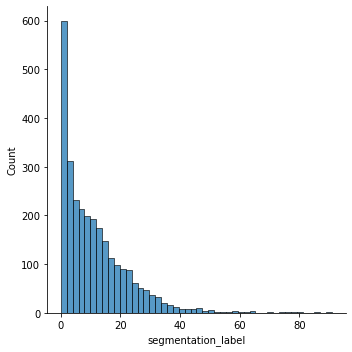

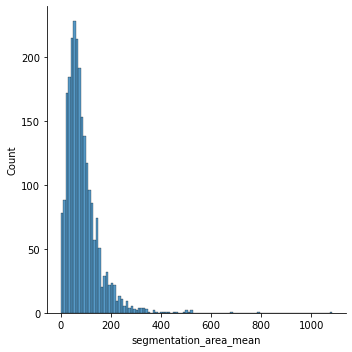

In [28]:
sns.displot(adata.obsm['features']['segmentation_label'])
sns.displot(adata.obsm['features']['segmentation_area_mean'])

By default, mean_intensity of all channels in the masked areas, area and number of segments are calculated. This can be changed by supplying `features_kwargs` to the function. Here, we calculate the convex area and the max_intensity of channels 1 and 2.

In [17]:
sq.im.calculate_image_features(adata, img, features=['segmentation'], key='features2', 
                                 features_kwargs={'segmentation':{'label_img_id': 'segmented', 'channels': [1,2], 
                                                                  'props':['max_intensity', 'convex_area']}})

display(adata.obsm['features2'])

/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,segmentation_convex_area_mean,segmentation_max_intensity_ch1_mean,segmentation_max_intensity_ch2_mean
AAACAAGTATCTCCCA-1,74.857143,12730.857143,14415.428571
AAACAGAGCGACTCCT-1,33.666667,4337.333333,8200.000000
AAACAGTGTTCCTGGG-1,NaN,NaN,NaN
AAACATTTCCCGGATT-1,115.266667,19210.666667,11557.333333
AAACCGGGTAGGTACC-1,148.000000,35200.000000,7532.000000
...,...,...,...
TTGTTCAGTGTGCTAC-1,44.500000,4661.333333,10536.000000
TTGTTGTGTGTCAAGA-1,51.480000,8851.680000,10260.320000
TTGTTTCACATCCAGG-1,NaN,NaN,NaN
TTGTTTCATTAGTCTA-1,NaN,NaN,NaN


## Plot features on image using napari / extract function - maybe even show before?
TODO

## Using another image layer
The ImageContainer may contain more images than just the tissue image. As shown in `ref-to-processing-notebook`, we can preprocess the image by e.g. smoothing it.
Use the `img_id` argument to set the image layer that should be used to extract the features.

In [30]:
# set path to dataset
BASE_PATH = "../../data"
dataset_folder = os.path.join(BASE_PATH, "20191205_10XVisium_MouseBrainCoronal_giovanni.palla")
adata, img = sq.read_visium_data(dataset_folder)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.var` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'feature_types' as categorical
Trying to set attribute `.var` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'genome' as categorical


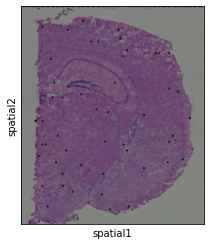

In [31]:
# subset adata to make computation of features fast
adata = adata[0:50]
# show which spots are selected for calculating the features
sc.pl.spatial(adata, add_outline=True)

In [38]:
sq.im.process_img(img, img_id='image', processing='smooth', processing_kwargs={'sigma': 2, 'preserve_range': True})

/Users/hannah.spitzer/projects/spatial_scanpy/squidpy/squidpy/im/processing.py:72: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  crops.append(ImageContainer(skimage.filters.gaussian(crop[img_id], **processing_kwargs), img_id=img_id_new, channel_id=channel_id))


In [40]:
# calculate features with masking
sq.im.calculate_image_features(adata, img, features=['summary'], 
                                                   key='features_raw')
# calculate features with scaling and larger context
sq.im.calculate_image_features(adata, img, img_id='image_smooth', features=['summary'],
                                                   key='features_smooth')


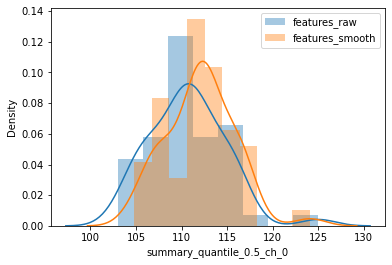

In [41]:
# plot distribution of median for different cropping options
sns.distplot(adata.obsm['features_raw']['summary_quantile_0.5_ch_0'], label='features_raw')
sns.distplot(adata.obsm['features_smooth']['summary_quantile_0.5_ch_0'], label='features_smooth')
_ = plt.legend()